In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/air-pollution.csv")

print(df.shape)
df.head()

(48225, 11)


,Entity,Code,Year,Nitrogen oxide (NOx),Sulphur dioxide (SO2),Carbon monoxide (CO),Organic carbon (OC),Non-methane volatile organic compounds (NMVOC),Black carbon (BC),Ammonia (NH3),Unnamed: 10
0,Afghanistan,AFG,1750,555.47860,174.87167,142073.31,5456.8850,13596.633,1633.0308,7681.0464,NaN
1,Afghanistan,AFG,1760,578.50757,181.99332,147859.23,5679.1167,14150.870,1699.5359,8000.8574,NaN
2,Afghanistan,AFG,1770,602.47980,189.38850,153867.40,5909.8840,14726.470,1768.5956,8333.9610,NaN
3,Afghanistan,AFG,1780,627.43220,197.06535,160104.42,6149.4410,15324.077,1840.2854,8680.9060,NaN
4,Afghanistan,AFG,1790,653.40310,205.03189,166576.77,6398.0370,15944.332,1914.6805,9042.2660,NaN


In [3]:
df.isna().sum()

Entity                                                0
Code                                               2508
Year                                                  0
Nitrogen oxide (NOx)                                  0
Sulphur dioxide (SO2)                                 0
Carbon monoxide (CO)                                  0
Organic carbon (OC)                                   0
Non-methane volatile organic compounds (NMVOC)        0
Black carbon (BC)                                     0
Ammonia (NH3)                                         0
Unnamed: 10                                       48225
dtype: int64

In [4]:
# Drop column with no info at all 
df = df.drop(columns=["Unnamed: 10"])

In [5]:
# Check for entities that have no code
df[df["Code"].isna()]["Entity"].unique()

array(['Africa', 'Asia', 'Europe', 'High-income countries',
       'Low-income countries', 'Lower-middle-income countries',
       'North America', 'Oceania', 'South America', 'Timor',
       'Upper-middle-income countries'], dtype=object)

In [6]:
continents_income_filter = ~df["Entity"].isin(["Africa", "Asia", "Europe", "North America", "Oceania", "South America", "High-income countries", "Low-income countries", "Lower-middle-income countries", "Upper-middle-income countries"])

filtered_df = df[continents_income_filter].copy()

filtered_df[filtered_df["Code"].isna()]

,Entity,Code,Year,Nitrogen oxide (NOx),Sulphur dioxide (SO2),Carbon monoxide (CO),Organic carbon (OC),Non-methane volatile organic compounds (NMVOC),Black carbon (BC),Ammonia (NH3)
42784,Timor,NaN,1750,32.377850,10.042501,3394.3657,203.97617,626.78450,37.276966,640.35900
42785,Timor,NaN,1760,32.969430,10.212449,3451.8079,207.42801,637.54230,37.907795,652.18677
42786,Timor,NaN,1770,33.571033,10.383693,3509.6880,210.90617,648.40120,38.543438,664.23000
42787,Timor,NaN,1780,34.182750,10.556042,3567.9421,214.40681,659.35175,39.183186,676.49225
42788,Timor,NaN,1790,34.804640,10.729280,3626.4963,217.92549,670.38300,39.826230,688.97723
...,...,...,...,...,...,...,...,...,...,...
43007,Timor,NaN,2018,5059.169000,1121.817300,10813.7310,1364.50930,15380.58400,368.279750,7436.25930
43008,Timor,NaN,2019,5057.677700,1105.011400,10825.7980,1371.13160,15445.75700,372.912400,7585.53200
43009,Timor,NaN,2020,4725.490000,998.522200,10687.4050,1371.11610,15485.31900,371.134060,7733.77600
43010,Timor,NaN,2021,4823.182000,1006.717600,10652.4170,1376.31240,15538.87200,374.622440,7884.54300


<Axes: xlabel='Entity'>

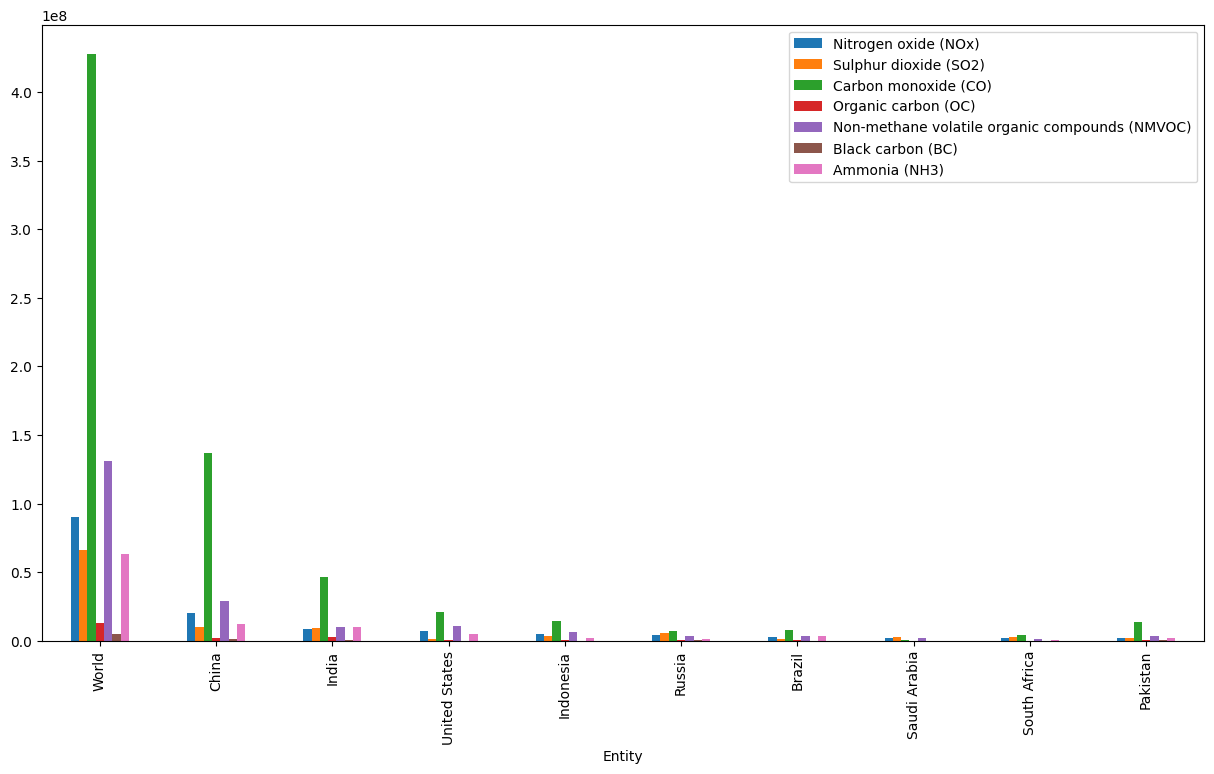

In [7]:
# checking plot if given year, the distribution of the metrics over all entities

year_df = filtered_df[filtered_df["Year"] == 2020]

# sort values by the metric
year_df = year_df.sort_values(by=["Nitrogen oxide (NOx)"], ascending=False)

# plot the top 10 entities
year_df.head(10).plot(x="Entity", y=["Nitrogen oxide (NOx)", "Sulphur dioxide (SO2)", "Carbon monoxide (CO)", "Organic carbon (OC)", "Non-methane volatile organic compounds (NMVOC)", "Black carbon (BC)", "Ammonia (NH3)"], kind="bar", figsize=(15, 8))

<Axes: xlabel='Year'>

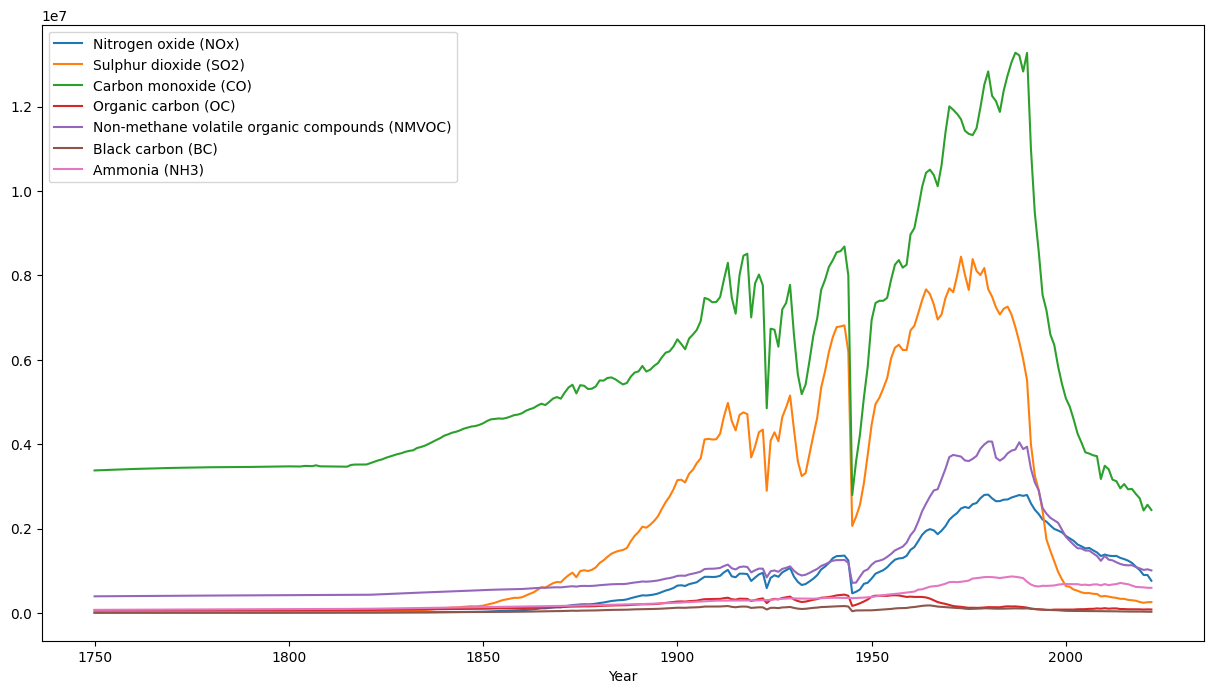

In [8]:
country_df = filtered_df[filtered_df["Entity"] == "Germany"]

country_df.plot(x="Year", y=["Nitrogen oxide (NOx)", "Sulphur dioxide (SO2)", "Carbon monoxide (CO)", "Organic carbon (OC)", "Non-methane volatile organic compounds (NMVOC)", "Black carbon (BC)", "Ammonia (NH3)"], kind="line", figsize=(15, 8))


In [7]:
# Calculate the average, median, and standard deviation for each metric 

filtered_df = filtered_df[filtered_df["Entity"] == "Germany"]
rounding_digits = 5
metrics = [
        "Nitrogen oxide (NOx)",
        "Sulphur dioxide (SO2)",
        "Carbon monoxide (CO)",
        "Organic carbon (OC)",
        "Non-methane volatile organic compounds (NMVOC)",
        "Black carbon (BC)",
        "Ammonia (NH3)",
    ]
stats = {}

for metric in metrics:
    values = df[metric].dropna()  # This would be better in a data preprocessing step
    stats[metric] = {
        "average": round(values.mean(), rounding_digits),
        "median": round(values.median(), rounding_digits),
        "std_dev": round(values.std(), rounding_digits),
    }

stats

{'Nitrogen oxide (NOx)': {'average': 540777.93755,
  'median': 1781.6083,
  'std_dev': 4408950.09637},
 'Sulphur dioxide (SO2)': {'average': 809118.25447,
  'median': 952.34375,
  'std_dev': 5761057.80114},
 'Carbon monoxide (CO)': {'average': 4885731.1945,
  'median': 108714.75,
  'std_dev': 28510803.67215},
 'Organic carbon (OC)': {'average': 131520.34177,
  'median': 4429.489,
  'std_dev': 674089.66216},
 'Non-methane volatile organic compounds (NMVOC)': {'average': 877192.58668,
  'median': 17703.459,
  'std_dev': 5769500.18289},
 'Black carbon (BC)': {'average': 47388.35916,
  'median': 1090.6442,
  'std_dev': 276950.53267},
 'Ammonia (NH3)': {'average': 352141.95063,
  'median': 9434.461,
  'std_dev': 2326559.55054}}